## Chapter 13: Multi-layer Perceptrons 

# 13.3 Activation functions

You can toggle the code on and off in this presentation via the button below.

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

- In principle one can use any function as an activation for a multi-layer perceptron.

- For a while activations were chosen largely based on their biological plausibility, since this is the perspective in which neural networks themselves were largely regarded.

- Today activation functions are chosen based on practical considerations like our ability to properly optimize multi-layer perceptron models which employ them as well as (of course) the general performance they provide.


In [1]:
## This code cell will not be shown in the HTML version of this notebook
# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# import autograd functionality
from autograd import grad

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

#### <span style="color:#a50e3e;">Example. </span>  The step and sigmoid activations

- Historically, biological neurons were thought to act somewhat like digital switches, being either completely 'on' or 'off' to transmitting information to connected cells. 

- This belief naturally led to the use of a *step function* taking on just two values: $0$ (off) and $1$ (on). 

- However this kind of step function leads to piece-wise flat cost functions which are extremely difficult to optimize using any local optimization technique. 

- In the context of logistic regression, this issue of piece-wise flat cost functions is what led to the *logistic sigmoid* function, as a smooth approximation to the step function.

- For the same reason the sigmoid function was one of the first popularly used activation functions, as a reasonable compromise between the desired neuronal model and the practical need to tune parameters properly.

<img src="../../mlrefined_images/nonlinear_superlearn_images/sigmoid.png" width="30%" height="auto"/>

- If we examine the derivative of a single-input sigmoid, we can see that any large (negative or positive) value passed through the derivative of the sigmoid is mapped to a value near zero.

- When used as activation in a multi-layer perceptron this potential problem can synergize across its presence in many units and layers, particularly when normalization schemes are not employed, and cause the gradient of a model employing such a network to *vanish* unexpectedly.

<img src="../../mlrefined_images/nonlinear_superlearn_images/sigmoid_derivative.png" width="30%" height="auto"/>

The hyperbolic tangent or $\text{tanh}$ activation introduced in Section 6.2.2, being defined in terms of the logistic sigmoid, can similarly suffer from the vanishing gradient problem even though it typically performs considerably better in practice, perhaps because it centers its output about the origin.

<IPython.core.display.Javascript object>


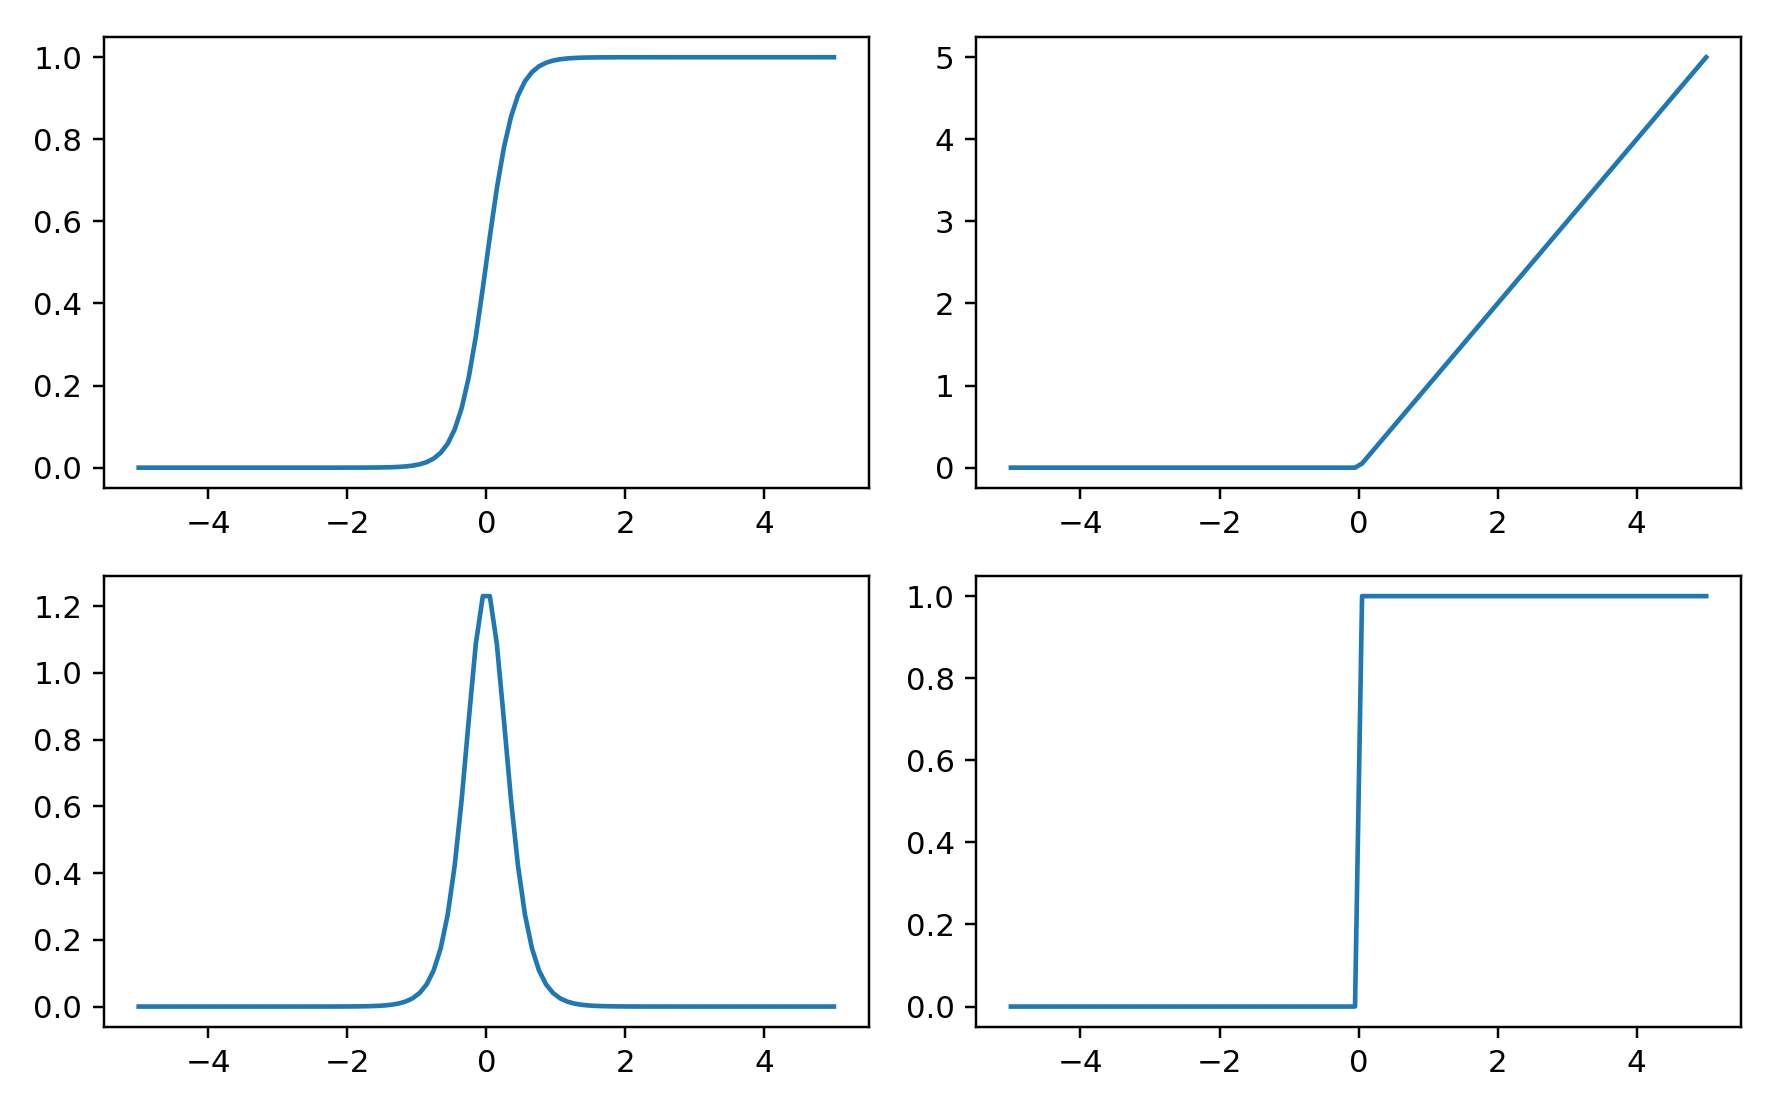

In [3]:
## This code cell will not be shown in the HTML version of this notebook
def activation1(w):
    a = 1/(1 + np.exp(-5*w))
    return a

def activation2(w):
    a = np.maximum(0,w)
    return a

# create input and functions to plot
w = np.linspace(-5,5,100)
a = activation1(w)
deg = 20
# a2 = my_act(w)
a2 = activation2(w)

# create derivatives to plot
der = grad(activation1)
b = np.array([der(v) for v in w])
der2 = grad(activation2)
b2 =  np.array([der2(v) for v in w])

### figure construction ###
# initialize figure
fig = plt.figure(figsize = (8,5))

# create subplot with 1 panel
gs = gridspec.GridSpec(2, 2) 
ax = plt.subplot(gs[0]); 
ax.plot(w,a)
ax = plt.subplot(gs[1]); 
ax.plot(w,a2)

ax = plt.subplot(gs[2]); 
ax.plot(w,b)
ax = plt.subplot(gs[3]); 
ax.plot(w,b2)

#### <span style="color:#a50e3e;">Example. </span>  The rectified linear unit (ReLU) activation

- A simpler function than a sigmoid (which involves both the use of a $\text{log}$ and exponential function), the ReLU function (and its relatives) have quickly become the most popular activation functions in use today.

- The ReLU function does not suffer from the same sort of vanishing gradient problem that the sigmoid does, as its derivative only maps negative values to zero.

<img src="../../mlrefined_images/nonlinear_superlearn_images/sigmoid_derivative.png" width="30%" height="auto"/>


- However, some care still must be taken when initializing and training a network employing ReLU activations.

- For example, a multi-layer perceptron employing ReLU activations should be initialized away from the origin to avoid too many of the units (and their gradients) from vanishing.

#### <span style="color:#a50e3e;">Example. </span>  The maxout activation

The *maxout* activation is a relative of the ReLU that takes the maximum of two linear combinations of the input (instead of one linear combination and zero, as is the case with ReLU)

\begin{equation}
a(x) = \text{max}(v_0 + v_1x, \,w_0 + w_1x) \\
\end{equation}

Four instances of such a maxout unit are plotted below, in each instance its parameters are chosen at random.

<IPython.core.display.Javascript object>


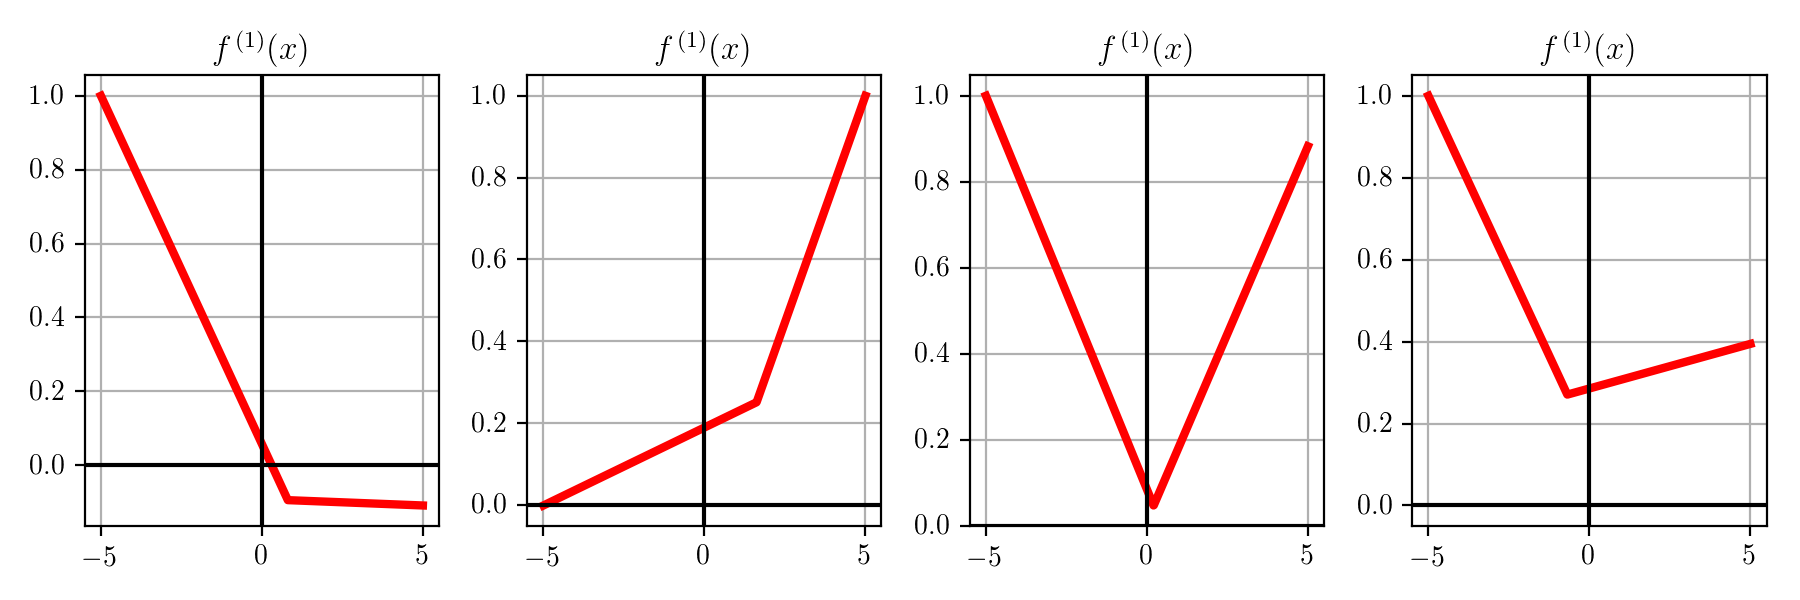

In [11]:
# This code cell will not be shown in the HTML version of this notebook
# import Draw_Bases class for visualizing various basis element types
demo = nonlib.DrawBases.Visualizer()

# plot the first 4 elements of a single hidden layer basis
demo.show_1d_net(num_layers = 1, activation = 'maxout')

Multi-layer perceptron architectures employing the maxout activation tend to have certain advantages over those employing $\text{tanh}$ and ReLU activations, including:

 - fewer issues with problematic initialization (e.g., values close to or equal to zero for the *ReLU* activation are bad because the relu is minimized at zero)
 - fewer issues with gradients vanishing
 - empirically faster convergence with far fewer gradient descent steps

These advantages come with a simple price: the maxout activation has twice as many internal parameters as either the ReLU or $\text{tanh}$.

<a id='bib_cell'></a>

## References

[1]  W. S. McCulloch and W. Pitts. A logical calculus of the ideas immanent in nervous activity. The bulletin of mathematical biophysics, 5(4):115–133, 1943.

[2]  D. O. Hebb. The organization of behavior: a neuropsychological theory. John Wiley & Sons, New York, 1949.

[3]  F. Rosenblatt. The perceptron - a perceiving and recognizing automaton. Cornell Aeronautical Laboratory, 1957.

[4]  B. Merker. From probabilities to percepts: a subcortical "global best estimate buffer" as locus of phenomenal experience". In: S. Edelman, T. Fekete and N. Zach (Eds.) Being in time: Dynamical models of phenomenal experience. (pp. 37–79). John Benjamins Publishing Company, Amsterdam, 2012.